In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [2]:
df=pd.read_csv("Linear Regression - Sheet1.csv")

In [3]:
df

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556
...,...,...
295,296,200.555556
296,297,201.222222
297,298,201.888889
298,299,1.888889


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       300 non-null    int64  
 1   Y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [5]:
df.isnull().sum()

X    0
Y    0
dtype: int64

# Splitting of data

In [6]:
#training i/p o/p
train_input=np.array(df.X[0:150]).reshape(150,1)
train_output=np.array(df.Y[0:150]).reshape(150,1)

#test i/p o/p
valid_input=np.array(df.X[150:300]).reshape(150,1)
valid_output=np.array(df.Y[150:300]).reshape(150,1)

In [7]:
print({valid_input.shape})

{(150, 1)}


# Step 1 : Forward Propogation

f(x)=m*x + c

In [8]:
def forward_prop(train_input,parameters):
    m=parameters["m"]
    c=parameters["c"]
    
    prediction=np.multiply(m,train_input)+c
    return prediction

# Step 2: Cost Function

In [9]:
def cost_function(prediction,train_output):
    cost=np.mean((train_output-prediction)**2) * 0.5
    return cost

# Step 3: Gradient Descent

In [10]:
def back_prop(train_input,train_output,prediction):
    derivatives=dict()
    df=prediction-train_output
    dm=np.mean(np.multiply(df,train_input))
    dc=np.mean(df)
    
    derivatives["dm"]=dm
    derivatives["dc"]=dc
    
    return derivatives
    

# Updating parameters

In [11]:
def update(parameters,derivatives,learning_rate):
    parameters["m"]=parameters["m"]-learning_rate * derivatives["dm"]
    parameters["c"]=parameters["c"]-learning_rate * derivatives["dc"]
    
    return parameters

# Model training

In [12]:
def train(train_input,train_output,learning_rate,iters):
    parameters=dict()
    parameters["m"]=np.random.uniform(0,1)
    parameters["c"]=np.random.uniform(0,1)
    
    plt.figure()
    #loss
    loss=list()
    
    
    
    for i in range(iters):
        prediction=forward_prop(train_input,parameters)
        cost=cost_function(prediction,train_output)
        
        loss.append(cost)
        print("Iteration=",i+1,"loss=",cost)
        fig,ax=plt.subplots()
        ax.plot(train_input,train_output,"+",label="Original")
        ax.plot(train_input,prediction,"*",label="Predicted")
        plt.plot(train_input,train_output,"+",label="Original")
        plt.plot(train_input,prediction,"*",label="Predicted")
        plt.show()
        
        derivatives=back_prop(train_input,train_output,prediction)
        parameters=update(parameters,derivatives,learning_rate)
    return parameters,loss  

Iteration= 1 loss= 128.32819180101714


<Figure size 640x480 with 0 Axes>

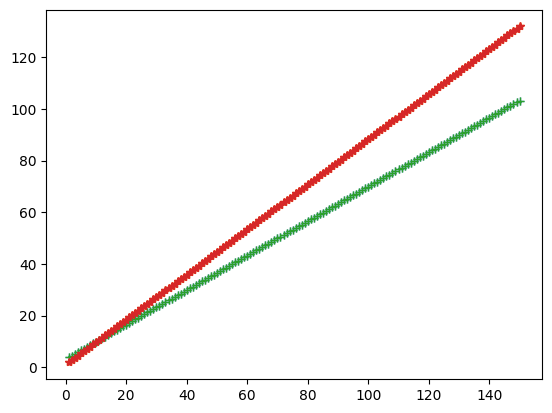

Iteration= 2 loss= 8.118966069460244


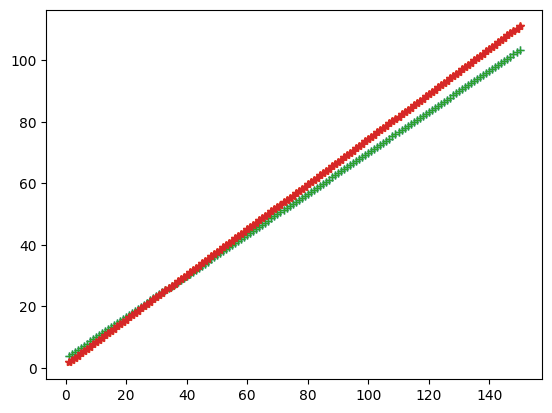

Iteration= 3 loss= 1.0552416272673748


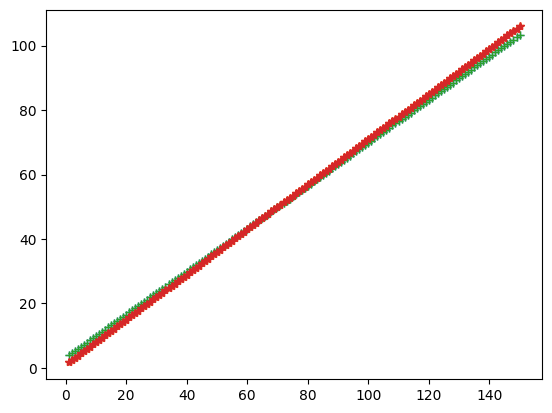

Iteration= 4 loss= 0.6401367090144887


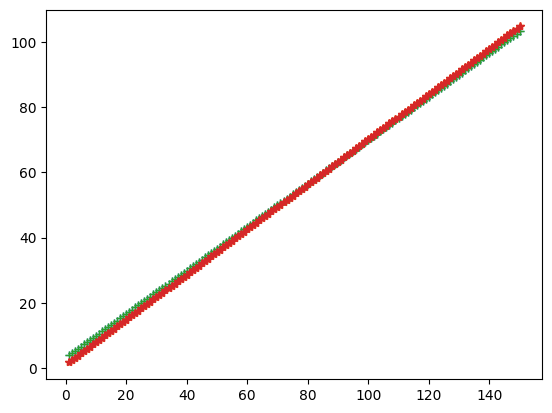

Iteration= 5 loss= 0.6157158322941754


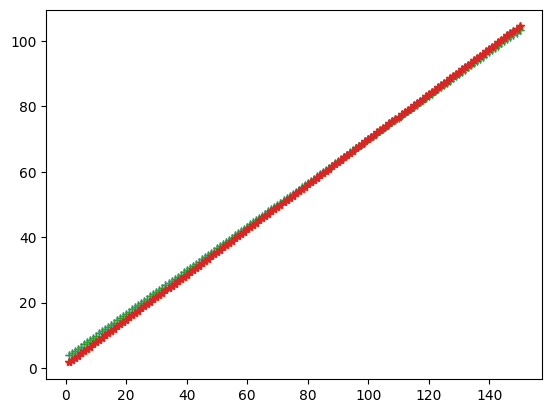

Iteration= 6 loss= 0.6142522068682056


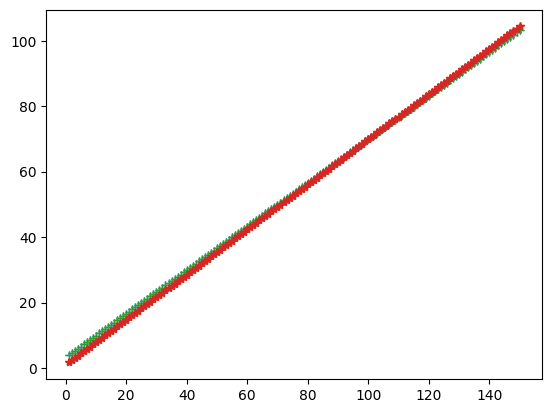

Iteration= 7 loss= 0.6141375894685752


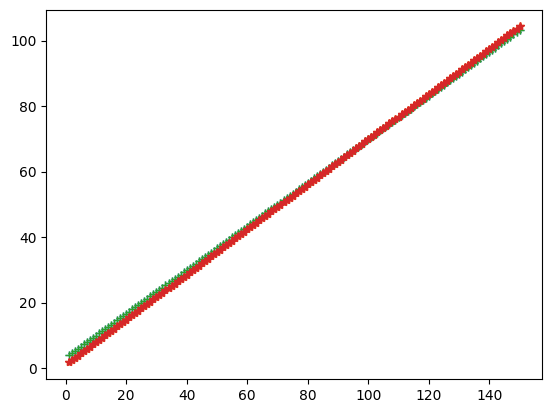

Iteration= 8 loss= 0.614102243460511


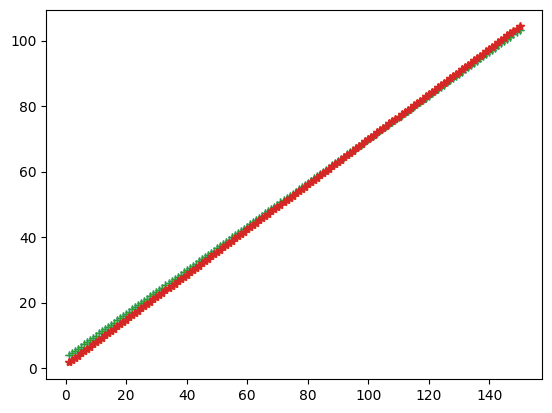

Iteration= 9 loss= 0.6140715569885652


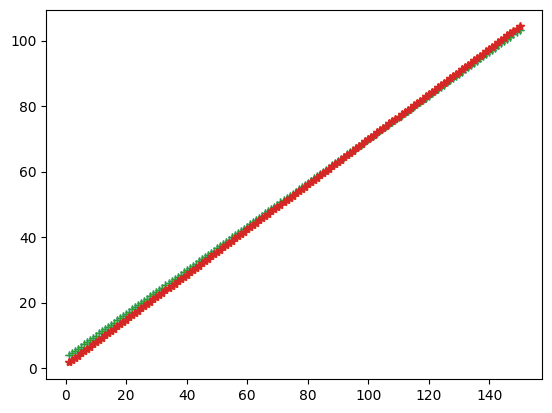

Iteration= 10 loss= 0.6140411457348389


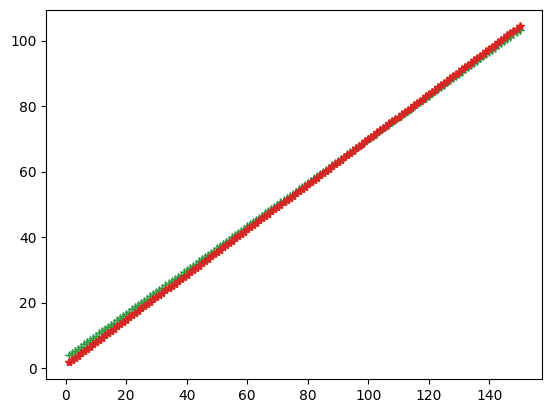

Iteration= 11 loss= 0.6140107520693854


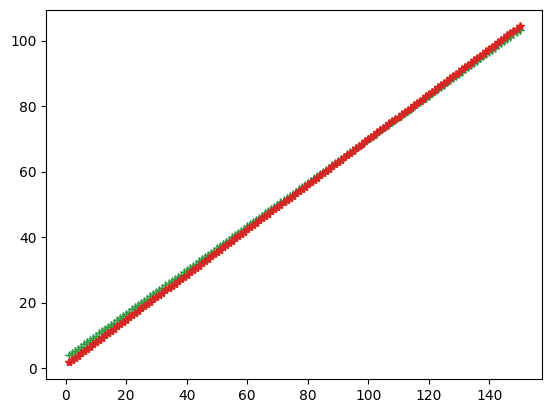

Iteration= 12 loss= 0.6139803608533714


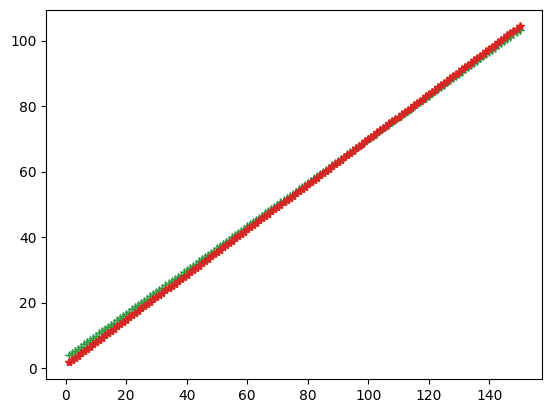

Iteration= 13 loss= 0.6139499711971329


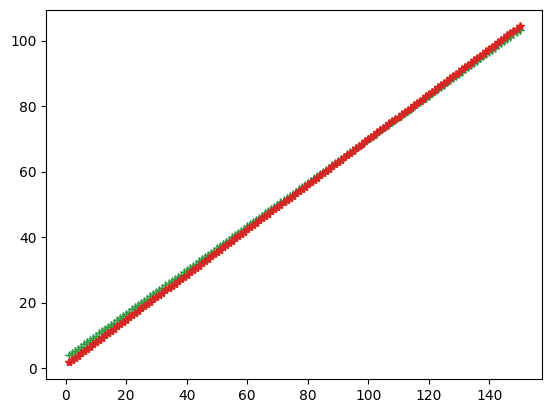

Iteration= 14 loss= 0.6139195830483319


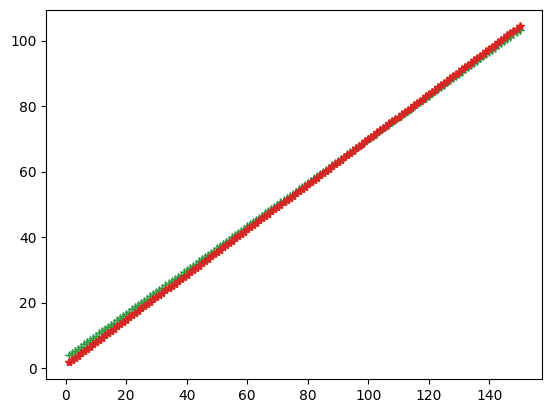

Iteration= 15 loss= 0.6138891964038181


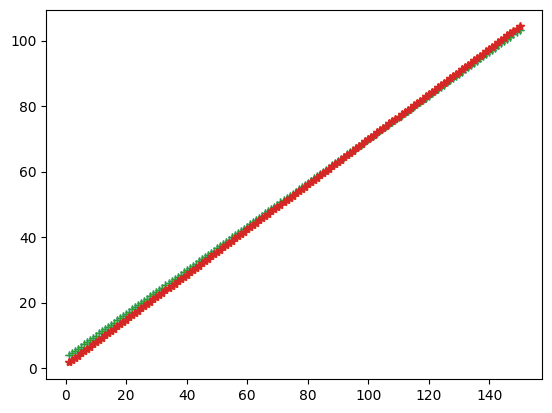

Iteration= 16 loss= 0.613858811263335


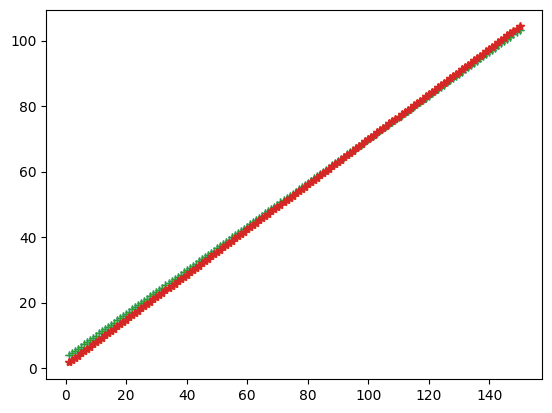

Iteration= 17 loss= 0.6138284276268018


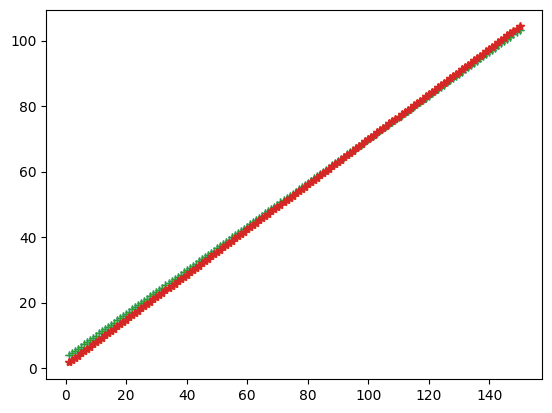

Iteration= 18 loss= 0.6137980454941381


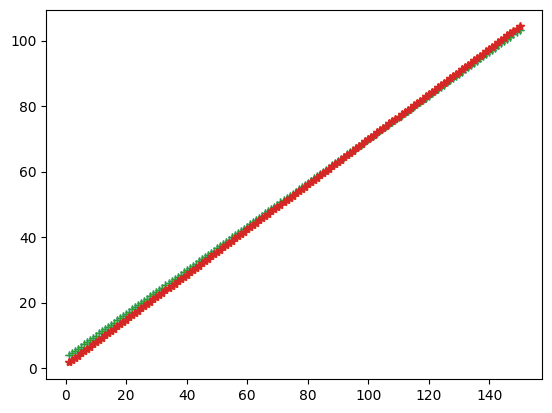

Iteration= 19 loss= 0.6137676648652738


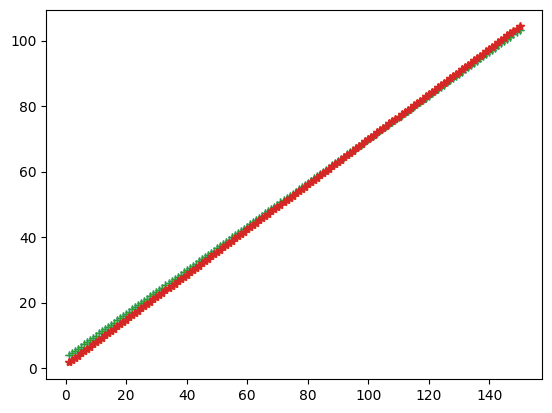

Iteration= 20 loss= 0.6137372857401329


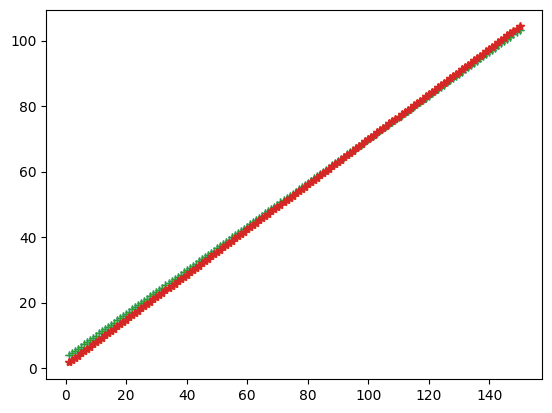

In [13]:
parameters,loss=train(train_input,train_output,0.0001,20)

In [14]:
print(parameters)

{'m': 0.6888624032860634, 'c': 0.9953227392314667}


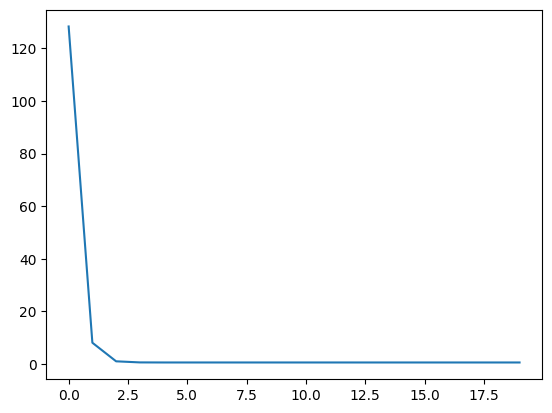

In [15]:
plt.plot(loss)

# Let's predict

In [16]:
test_prediction = valid_input * parameters["m"] + parameters["c"]

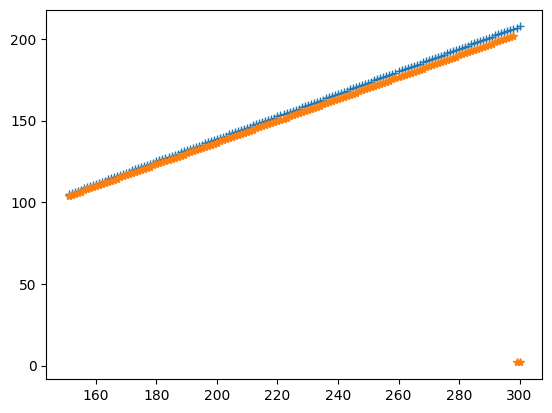

In [17]:
plt.plot(valid_input,test_prediction,"+")
plt.plot(valid_input,valid_output,"*")
plt.show()

In [23]:
print(loss[-1])

0.6137372857401329
